# Introduction to Deep Learning

## Neural networks in PyTorch

In [13]:
import torch

### Basics

In [14]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


### Linear layer

In [15]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = torch.nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.5632, -0.2993, -0.1505],
        [ 0.0408, -0.1620,  0.1505]], requires_grad=True)
b:  Parameter containing:
tensor([-0.2771,  0.3796], requires_grad=True)
loss:  1.4048222303390503
dL/dw:  tensor([[ 0.1413, -0.1891, -0.5014],
        [ 0.3656,  0.2421,  0.4669]])
dL/db:  tensor([-1.0953,  0.3878])
loss after 1 step optimization:  1.3842906951904297


### Pytorch Tensors and Numpy

In [16]:
import numpy as np

In [17]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print("Original numpy: ", x, sep="\n")
print("PyTorch tensor: ", y, sep="\n")
print("Converted numpy: ", z, sep="\n")

Original numpy: 
[[1 2]
 [3 4]]
PyTorch tensor: 
tensor([[1, 2],
        [3, 4]])
Converted numpy: 
[[1 2]
 [3 4]]


### Datasets

#### Use external

In [18]:
import torchvision

In [19]:
# Download and construct MNIST dataset.
train_dataset = torchvision.datasets.MNIST(root='data/',
                                             train=True, 
                                             transform=torchvision.transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([1, 28, 28])
5


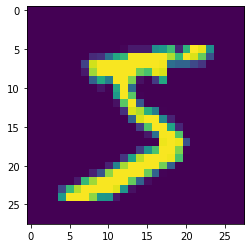

In [20]:
import matplotlib.pyplot as plt
plt.imshow(torchvision.transforms.ToPILImage()(image))

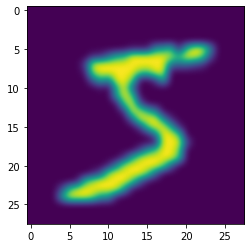

In [21]:
plt.imshow(torchvision.transforms.ToPILImage()(image), interpolation="bicubic")

In [22]:
# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

#### Create your own

In [ ]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        # Will be error
        return 0

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

### Models

## Feedforward Neural Network

Based on https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py

In [24]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.3008
Epoch [1/5], Step [200/600], Loss: 0.2738
Epoch [1/5], Step [300/600], Loss: 0.2568
Epoch [1/5], Step [400/600], Loss: 0.1243
Epoch [1/5], Step [500/600], Loss: 0.1614
Epoch [1/5], Step [600/600], Loss: 0.1019
Epoch [2/5], Step [100/600], Loss: 0.1101
Epoch [2/5], Step [200/600], Loss: 0.1496
Epoch [2/5], Step [300/600], Loss: 0.0793
Epoch [2/5], Step [400/600], Loss: 0.1846
Epoch [2/5], Step [500/600], Loss: 0.1532
Epoch [2/5], Step [600/600], Loss: 0.0690
Epoch [3/5], Step [100/600], Loss: 0.0990
Epoch [3/5], Step [200/600], Loss: 0.0792
Epoch [3/5], Step [300/600], Loss: 0.0424
Epoch [3/5], Step [400/600], Loss: 0.0413
Epoch [3/5], Step [500/600], Loss: 0.0877
Epoch [3/5], Step [600/600], Loss: 0.1219
Epoch [4/5], Step [100/600], Loss: 0.0370
Epoch [4/5], Step [200/600], Loss: 0.0434
Epoch [4/5], Step [300/600], Loss: 0.0795
Epoch [4/5], Step [400/600], Loss: 0.1213
Epoch [4/5], Step [500/600], Loss: 0.0404
Epoch [4/5], Step [600/600], Loss:

## References

1. https://github.com/yunjey/pytorch-tutorial/